In [8]:
# import all necessary packages
import pandas as pd
import numpy as np
import json
import datetime
#import seaborn as sns
#import matplotlib as mlp
import matplotlib.pyplot as plt
#from datetime import datetime

# import dataset
dfPhiladelphia = pd.read_csv("data/tmp/dfPhiladelphia.csv.zip")
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733481 entries, 0 to 733480
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_date          733481 non-null  object 
 1   end_date            733481 non-null  object 
 2   start_time_hourly   733481 non-null  int64  
 3   end_time_hourly     733481 non-null  int64  
 4   start_station_id    733481 non-null  int64  
 5   end_station_id      733481 non-null  int64  
 6   start_latitude      733481 non-null  float64
 7   start_longitude     733481 non-null  float64
 8   end_latitude        733481 non-null  float64
 9   end_longitude       733481 non-null  float64
 10  min_temp            733481 non-null  float64
 11  max_temp            733481 non-null  float64
 12  precip              733481 non-null  float64
 13  user_type           733481 non-null  object 
 14  dayOfWeek           733481 non-null  int64  
 15  isWeekend           733481 non-nul

# 4. Predictive Analytics

- Since the **total system-level demand in the next hour** is of our interest, the station-dependent demand is not needed in this task.
- Our target value is `y = numOfRentedBikes`

## 4.1 Feature Engineering

In this subtask, we will:
- Develop a rich set of features that we expect to be correlated with our target
- We will justify the selection of features

In [9]:
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733481 entries, 0 to 733480
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_date          733481 non-null  object 
 1   end_date            733481 non-null  object 
 2   start_time_hourly   733481 non-null  int64  
 3   end_time_hourly     733481 non-null  int64  
 4   start_station_id    733481 non-null  int64  
 5   end_station_id      733481 non-null  int64  
 6   start_latitude      733481 non-null  float64
 7   start_longitude     733481 non-null  float64
 8   end_latitude        733481 non-null  float64
 9   end_longitude       733481 non-null  float64
 10  min_temp            733481 non-null  float64
 11  max_temp            733481 non-null  float64
 12  precip              733481 non-null  float64
 13  user_type           733481 non-null  object 
 14  dayOfWeek           733481 non-null  int64  
 15  isWeekend           733481 non-nul

The feature creation process was already done in task 1: This are all features which we created in Task 1

**Remove unnecessary features**

We won't need:
- 'end_date', because
- 'end_time_hourly', because
- 'start_station_id', because we are interested in the **total system-level demand in the next hour**
- 'end_station_id', because
- 'start_latitude', because
- 'start_longitude', because
- 'end_latitude', because
- 'end_longitude', because
- 'start_station_name', because
- 'end_station_name', because
- 'tripduration_sec', because

We will need:
- 'start_date', because
- 'start_time_hourly', because
- 'numOfRentedBikes', because

We will test/evaluate if we need the following features, in a later step (x.x.x):
- 'min_temp', because
- 'max_temp', because
- 'precip', because
- 'user_type', because
- 'dayOfWeek', because
- 'isWeekend', because
- 'season', because
- 'isHoliday', because
- 'isRushhour', because
- #'tripLengthDistance', because

In [21]:
#Take only necessary columns (implicit drop of unselected columns)
dfPhiladelphia = dfPhiladelphia[['start_date',
                                 'start_time_hourly',
                                 'min_temp',
                                 'max_temp',
                                 'precip',
                                 'user_type',
                                 'dayOfWeek',
                                 'isWeekend',
                                 'season',
                                 'isHoliday',
                                 'isRushhour',
                                 #'tripLengthDistance',
                                 'numOfRentedBikes'
                                ]]

### 4.1.1 Dummy Feature Creation (maybe after evaluation)
- We already created all features we need in Task 1, but we need to change some features into dummy variables to assure predictive performance

In [22]:
# here just 2 blocks of code

### 4.1.2 Justify the selection of features / (Feature evaluation)

In [23]:
# Variance criteria or correlation criteria or filtering or embedded methods
# we will take variance & correlations

#### Variance:

In [24]:
#### take out features which will become dummys
#### season and so on missing, but we do know the variance because, we defined it
dfPhiladelphia[['start_time_hourly', 'min_temp', 'max_temp', 'precip', 'dayOfWeek', 'isWeekend', 'isHoliday', 'isRushhour', 'numOfRentedBikes']].var()

start_time_hourly      24.980862
min_temp               87.457681
max_temp               87.615618
precip                  0.042017
dayOfWeek               3.747954
isWeekend               0.183420
isHoliday               0.020595
isRushhour              0.249996
numOfRentedBikes     7759.717475
dtype: float64

In [27]:
# min_temp & max_temp same variance => validate if they have different values

#### Correlations

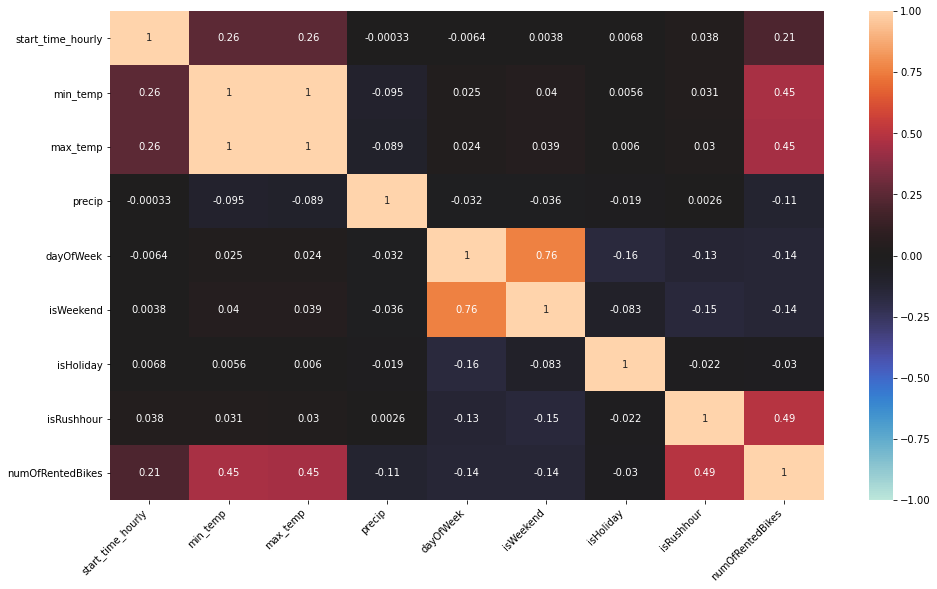

In [28]:
######## make named features like season to 0/1/2/3 so they show up here, before we make them a dummy variable like hours
import seaborn as sns
corr = dfPhiladelphia.corr()
plt.figure(figsize = (16,9))
ax = sns.heatmap(corr, vmin = -1, vmax= 1, center = 0, annot=True)

ax.set_xticklabels(ax.get_xticklabels(),
                  rotation = 45,
                  horizontalalignment = 'right')

ax.set_yticklabels(ax.get_yticklabels(),
                   rotation =0,
                   horizontalalignment = 'right')

plt.show()

#### Feature selection:
    
We will keep all features, since we do not have so much features and they all do have a correlation with our target value `y = numOfRentedBikes`

### 4.1.3 (Visualisation of dependencies)

### 4.1.x DUMMY MAYBE HERE

## 4.2 Model Building & Evaluation

**Normalize the input values**

In [ ]:
#set output frame and input frame
x = dfPhiladelphia[[#list all selected input features#]]
y = dfPhiladelphia['numberOfRentedBikes']

In [ ]:
# Normalize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_norm = scaler.fit_transform(x)

**Split the dataset in trainset, validationset and testset (50-20-30)**

In [ ]:
#split the data set in 70% training set and 30% testing set
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3,random_state=42)

# save the combination of training and validation set in extra variables
x_train_val = x_train
y_train_val = y_train

#split the training data set in 70% training set and 20% validation set to achieve a 50-20-30 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(0.2/0.7), random_state = 42)

**We now have the following datasets:**
- x_train, y_train &rarr; 50% input features for training the model
- x_val, y_val &rarr; 20% to select hyperparameters
- x_test, y_test &rarr; 30% to control the accurancy of the model

### 4.2.1 First Regression (Maybe Lasso)

### 4.2.2 Second Regression (Maybe Support vector machine)

In [ ]:
# from sklearn.svm import SVR

Creating SVR models with different kernels and looking for the best kernel to use.

**SVR with linear kernel**

In [ ]:
# svr_linear = SVR(kernel = 'linear', max_iter = 7500, cache_size = 6000)
# lin_fit = svr_linear.fit(x_train, y_train)

In [ ]:
# y_lin_predict = lin_fit.predict(x_test) or using x_val ? 

In [ ]:
# print('The R^2 is: ',r2_score(y_test, y_lin_predict))

**SVR with poly kernel (degree: 2)**

In [ ]:
# svr_poly2 = SVR(kernel = 'poly',degree = 2 ,max_iter = 7500, cache_size = 6000)
# poly2_fit = svr_poly2.fit(x_train, y_train)

In [ ]:
# y_poly2_predict = lin_fit.predict(x_test) or using x_val ? 

In [ ]:
# print('The R^2 is: ',r2_score(y_test, y_poly2_predict))

**SVR with poly kernel (degree: 3)**

In [ ]:
# svr_poly3 = SVR(kernel = 'poly', degree = 3, max_iter = 7500, cache_size = 6000)
# poly3_fit = svr_poly3.fit(x_train, y_train)

In [ ]:
# y_poly3_predict = lin_fit.predict(x_test) or using x_val ? 

In [ ]:
# print('The R^2 is: ',r2_score(y_test, y_poly3_predict))

**SVR with rbf kernel**

In [ ]:
# svr_rbf = SVR(kernel = 'rbf', max_iter = 7500, cache_size = 6000)
# rbf_fit = svr_rbf.fit(x_train, y_train)

In [ ]:
# y_rbf_predict = lin_fit.predict(x_test) or using x_val ? 

In [ ]:
# print('The R^2 is: ',r2_score(y_test, y_rbf_predict))

The best kernel (evaluated by using R^2) is ...

(plotting the regression line (target value) and data) ??

**Finding the best hyperparameters**

Do Grid Search: finding the best hyperparameters for our model

In [ ]:
# def hyperparameters ()

Defining between which numbers the parameters C and epsilon for the model can be.

evaluate performance

### 4.2.3 Artificial Neural Network

- Before running you have to install tensorflow: `pip install tensorflow`

**Building the model with the functional API of Keras:**

In [ ]:
#pip install tensorflow

In [ ]:
# Import keras libraries
import tensorflow
from tensorflow inport keras
from keras import layers

In [ ]:
###### INTEGRATE HYPERPARAMTERTUNING TIPPS!
###### RELU IN EACH LAYER?

def build_model(hp):
    # Input Layer
    inputs = keras.Input(shape=(8,)) # shapesize dependent of input features
    
    # Hidden Layers
    ## First Hidden Layer
    dense = layers.Dense(units=hp.Int('hidden_layer_1_units', min_value=32, max_value=256, step=32), activation='relu')
    x = dense(inputs)
    
    ## Possible additional Hidden Layers
    for i in range(hp.Int('total_added_hidden_layers', 0, 10)):
        x = layers.Dense(units=hp.Int(f'hidden_layers_{i+2}_units', min_value=32, max_value=256, step=32), activation='relu')(x)
    
    # Output Layer
    output = layers.Dense(1, activation='relu')(x)
    
    # Instantiate the model
    model_ann = keras.Model(inputs, output, name='system_level_bike_rental_demand_philadelphia')
    
    # Compile the model
    model_ann.compile(optimizer='Adamax', loss='mean_squared_error') # MAYBE TRY DIFFERENT OPTIMIZER
    
    return model_ann

**Use hyperparameter tuning to find the best model:**

You need to install keras_tuner first: You can use `pip install keras-tuner`

In [ ]:
#pip install keras-tuner

In [ ]:
import keras_tuner
from keras_tuner.tuners import Hyperband
import IPython

Instantiate a tuner for hyperparametertuning:

- We choose the HyperBand Tuner from Keras

In [ ]:
tuner = Hyperband(
    build_model,
    objective = 'val_loss',
    max_epochs = 20,
    factor = 3,
    executions_per_trial = 1,
    #directory = os.path.normpath('C:/#######')
    project_name = 'kerastuner_LOG',
    overwrite = True # deletes old LOG's
    )

Show a summary of the search space:

In [ ]:
tuner.search_space_summary()

To clear the training outputs after each training step define a callback:

In [ ]:
class ClearTrainingOutput(keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

Hyperparameter Search:

In [ ]:
tuner.search(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    callbacks = [ClearTrainingOutput()]
    )

Show a summary of the results which presents the best model, the hyperparameters and the metrics:

In [ ]:
tuner.results_summary()

Get optimal hyperparameters:

In [ ]:
ann_best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. 
The optimal number of units in the first hidden layer is {ann_best_hps.get('hidden_layer_1_units')} 
and the total number of hidden layers is {ann_best_hps.get('total_added_hidden_layers')+1}.
""")

Get the best model:

In [ ]:
model_ann = tuner.get_best_models(num_models=1)[0]

Show a summary of the model:

In [ ]:
model_ann.summary()

Plot the model as a graph:

You need to install pydot and graphivz. You can use: `conda install -c anaconda graphviz`and `conda install -c conda-forge python-graphviz` sequentially and `conda install -c conda-forge pydot`

In [ ]:
#pip install pydot

In [ ]:
keras.utils.plot_model(model_ann, 'model_ann_system_level_bike_rental_demand_philadelphia.png', show_shapes=True)

**Train the model:**

In hyperparameter tuning the model was only trained with 20 epochs because of the performance. So now we continue the training to get a optimal result.

Define a callback which stops earlier when their is no further improvement and which avoids overfitting:

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=50, 
    restore_best_weights=True 
    )

In [ ]:
model_ann.fit(x_train, y_train, epochs=500, validation_data=(x_val,y_val), callbacks=[callback])

**Evaluation of the performance of the model:**

In [ ]:
pred_ann = model_ann.predict(x_test)

# Calculate MAE and RMSE
mae_ann = mean_absolute_error(y_test,pred_ann)
rmse_ann = mean_squared_error(y_test,pred_ann)**0.5

print("MAE:", mae_ann)
print("RMSE:", rmse_ann)
print("Accuracy:", round((1-(mae_ann/dfPhiladelphia["numOfRentedBikes"].mean()))*100,2), "%")